# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pds
import datetime as dts
import math

## Step1. 下載資料

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [3]:
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
print(breast_cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
X_RawData = pds.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
X_RawData.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
target = breast_cancer.target
target_names = breast_cancer.target_names
# print(type(target))
# print(type(target_names))

In [7]:
Labels = target_names[target]

In [32]:
Labels

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignan

## Step2. 區分訓練集與測試集

In [8]:
#設定隨機種子(random_state) 為 40，測試組比例佔 30%
x_train, x_test, y_train, y_test = train_test_split(X_RawData, breast_cancer.target ,test_size=0.3, random_state = 40)

## Step3. 建模

In [9]:
LinearSvc01 = svm.LinearSVC()
LinearSvc01.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
def feature_importances(inputCoef, f_Names):
    imp = inputCoef
    s_imp, names = zip(*sorted(zip(imp, f_Names)))
    plt.barh(range(len(names)), s_imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [11]:
myFeature = breast_cancer.feature_names.reshape(1,30)

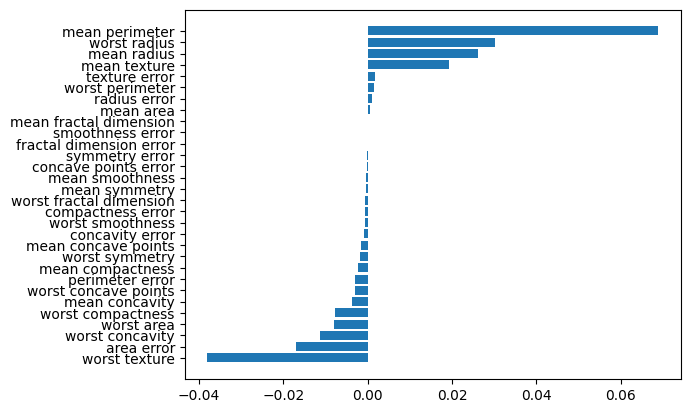

In [12]:
feature_importances(LinearSvc01.coef_[0], myFeature[0])

## Step4.預測

In [12]:
prediction_train = LinearSvc01.predict(x_train)
prediction_test = LinearSvc01.predict(x_test)

## Step5. 準確度分析

In [13]:
error_index_train_LinearSvc = np.where(prediction_train != y_train)[0]
print('train accuracy:', round(1-len(error_index_train_LinearSvc)/len(x_train), 4))
error_index_test_LinearSvc = np.where(prediction_test != y_test)[0]
print('test accuracy:',round(1-len(error_index_test_LinearSvc)/len(x_test), 4))

train accuracy: 0.9271
test accuracy: 0.9181


In [14]:
print('train accuracy:', round(LinearSvc01.score(x_train,y_train), 4))
print('test accuracy:', round(LinearSvc01.score(x_test, y_test), 4))

train accuracy: 0.9271
test accuracy: 0.9181


## Extra01 各模型比較處理（不含 kernel = 'poly')

In [15]:
Model_Setting = ['LinearSVC', 'linear', 'rbf', 'sigmoid']
for myModel in Model_Setting:
    if myModel == 'LinearSVC':
       Model_Selected = svm.LinearSVC()
    else:
       Model_Selected = svm.SVC(kernel = myModel, gamma='auto', C = 100)
    Model_Selected.fit(x_train, y_train)
    print('training accuracy for ' + myModel + ':', round(Model_Selected.score(x_train,y_train), 4))
    print('testing accuracy for ' + myModel + ':', round(Model_Selected.score(x_test, y_test), 4))

training accuracy for LinearSVC: 0.8392
testing accuracy for LinearSVC: 0.8713
training accuracy for linear: 0.9673
testing accuracy for linear: 0.9649
training accuracy for rbf: 1.0
testing accuracy for rbf: 0.6725
training accuracy for sigmoid: 0.608
testing accuracy for sigmoid: 0.6725


Extra01 結論：由以上結果發現，kernal = 'Linear' 建模結果最佳

## Extra02 各模型拆成建模、測試、驗證三組比較處理（不含 kernel = 'poly')

In [16]:
x_raw_02, x_Vald_02, y_raw_02, y_Vald_02 = train_test_split(X_RawData, breast_cancer.target ,test_size=0.2, random_state = 40)

In [17]:
x_train_02, x_test_02, y_train_02, y_test_02 = train_test_split(x_raw_02, y_raw_02 ,test_size=0.3, random_state = 40)

In [18]:
for myModel in Model_Setting:
    if myModel == 'LinearSVC':
       Model_Selected = svm.LinearSVC()
    else:
       Model_Selected = svm.SVC(kernel = myModel, gamma='auto', C = 100)
    Model_Selected.fit(x_train, y_train)
    print('train accuracy for ' + myModel + ':', round(Model_Selected.score(x_train_02,y_train_02), 4))
    print('test accuracy for ' + myModel + ':', round(Model_Selected.score(x_test_02, y_test_02), 4))
    print('validation accuracy for ' + myModel + ':', round(Model_Selected.score(x_Vald_02, y_Vald_02), 4))

train accuracy for LinearSVC: 0.9308
test accuracy for LinearSVC: 0.9124
validation accuracy for LinearSVC: 0.9561
train accuracy for linear: 0.9748
test accuracy for linear: 0.9562
validation accuracy for linear: 0.9561
train accuracy for rbf: 0.9686
test accuracy for rbf: 0.9489
validation accuracy for rbf: 0.6579
train accuracy for sigmoid: 0.6195
test accuracy for sigmoid: 0.6204
validation accuracy for sigmoid: 0.6579


Extra02 結論：由以上結果發現，仍是 kernal = 'Linear' 建模驗證結果最佳

## Extra03 Poly 分析處理
1.先檢視兩個變數的相關性（找出低度相關性的變數）\
2.利用迴圈分析任兩個變數的組合所跑出的 svm 模型 \
　找出 Training Score 與 Testing Score 結果都在 90 百分位數以上，且兩變數線性相關係數屬於低相關係數（0.3）的變數組合 \
3.圖像化模型解釋能力

In [19]:
TableCorr = X_RawData.corr()
LowCorrSetting = 0.3
TableCorrTransposed=[]
# print(TableCorr.loc["mean radius"]["mean texture"])
for indexName in breast_cancer.feature_names:
    for columnName in breast_cancer.feature_names:
        if indexName != columnName:
           if abs(TableCorr.loc[indexName][columnName]) <= LowCorrSetting:
              TableCorrTransposed.append([indexName, columnName, round(TableCorr.loc[indexName][columnName], 6)])

In [20]:
TableCorrTransposed_DF = pds.DataFrame(TableCorrTransposed, columns = ["Feature01", "Feature02", "CorrCoefficient"])

In [21]:
import itertools # C(m, n) 的工具

In [22]:
MaxFeatureCount = 2
FeatureCombinations = list(itertools.combinations(myFeature[0], MaxFeatureCount))
print(len(FeatureCombinations))
# 30 個變數任取 2 個，共有 435 種組合 30 * 29 / 2 = 435

435


In [23]:
# 將最高次方項(degree)設為 2，若設為 3 以上，結果是程式會跑不完，random_state 設為 40 以便後續畫圖不會跑掉
# 這段程式因為會跑 435 種組合的建模結果，需要跑 15~30 分鐘（視硬體規格）
Model_Score =[]
# r_count = 1
for FeatureTuple in FeatureCombinations:
    FeatureList = list(FeatureTuple)
    SvcPoly = svm.SVC(kernel = 'poly', gamma='auto', degree = 2)
    x_train_poly, x_test_poly, y_train_poly, y_test_poly, = train_test_split(X_RawData[FeatureList], breast_cancer.target ,test_size=0.3, random_state = 40)
    SvcPoly.fit(x_train_poly, y_train_poly)
    Model_Score.append([FeatureList[0],FeatureList[1], round(SvcPoly.score(x_train_poly, y_train_poly), 6), round(SvcPoly.score(x_test_poly, y_test_poly), 6)])
    # print('Running Counts = ' + str(r_count))
    # print(','.join(FeatureList) + ' train accuracy:', round(SvcPoly.score(x_train_poly,y_train_poly), 6))
    # print(','.join(FeatureList) + ' test accuracy:', round(SvcPoly.score(x_test_poly, y_test_poly), 6))
    # r_count += 1

In [24]:
PolyScore_DF = pds.DataFrame(Model_Score, columns = ["Feature01", "Feature02", "Training_Score", "Testing_Score"])
Training_Score_P90 = round(PolyScore_DF.Training_Score.quantile(0.9), 6)
Testing_Score_P90 = round(PolyScore_DF.Testing_Score.quantile(0.9), 6)
print("Training Score Percentile 90%: ", Training_Score_P90)
print("Testing Score Percentile 90%: ", Testing_Score_P90)

Training Score Percentile 90%:  0.927136
Testing Score Percentile 90%:  0.923977


In [25]:
PolyScore_Corr_DF = pds.merge(PolyScore_DF, TableCorrTransposed_DF, how = 'left', on = ["Feature01", "Feature02"]).dropna(subset=['CorrCoefficient'])
PolyScore_Corr_DF = PolyScore_Corr_DF[(PolyScore_Corr_DF["Training_Score"] >= Training_Score_P90) & (PolyScore_Corr_DF["Testing_Score"] >= Testing_Score_P90)].reset_index().drop("index", axis = 1)

In [26]:
PolyScore_Corr_DF

,Feature01,Feature02,Training_Score,Testing_Score,CorrCoefficient
0,mean radius,worst smoothness,0.937186,0.959064,0.119616
1,mean texture,mean concave points,0.927136,0.935673,0.293464
2,mean perimeter,worst smoothness,0.939698,0.947368,0.150549
3,mean smoothness,worst radius,0.927136,0.923977,0.213120
4,mean concave points,worst texture,0.932161,0.935673,0.292752
5,mean symmetry,worst perimeter,0.929648,0.941520,0.219169
6,worst radius,worst smoothness,0.949749,0.959064,0.216574
7,worst radius,worst symmetry,0.929648,0.947368,0.243529
8,worst perimeter,worst smoothness,0.942211,0.959064,0.236775
9,worst perimeter,worst symmetry,0.929648,0.947368,0.269493


In [27]:
# PolyScore_Corr_DF.loc[0, "Feature01"]

'mean radius'

In [28]:
plot_Featurelist = []
for df_r in range(len(PolyScore_Corr_DF)):
    plot_Featurelist.append([PolyScore_Corr_DF.loc[df_r, "Feature01"], PolyScore_Corr_DF.loc[df_r, "Feature02"]])

In [35]:
OverAllData = X_RawData
OverAllData["Tatget"] = Labels

(569, 31)

In [88]:
# 借用老師的程式（稍微調整）

def SVM_plot(clf, CurrentFeature, SubFig):
    # X, Y 軸分別加減 10%（考量變數沒有標準化）　    
    Interval_x = round((OverAllData[CurrentFeature[0]].max() - OverAllData[CurrentFeature[0]].min()) / 10, 2)
    training_x_min=OverAllData[CurrentFeature[0]].min() - Interval_x
    training_x_max=OverAllData[CurrentFeature[0]].max() + Interval_x
    Interval_y = round((OverAllData[CurrentFeature[1]].max() - OverAllData[CurrentFeature[1]].min()) / 10, 2)    
    training_y_min=OverAllData[CurrentFeature[1]].min() - Interval_y
    training_y_max=OverAllData[CurrentFeature[1]].max() + Interval_y
    
    grid_interval=0.02
    x_dot,y_dot=np.meshgrid(np.arange(training_x_min,training_x_max, grid_interval),np.arange(training_y_min, training_y_max, grid_interval))
    
    Z = clf.predict(np.c_[x_dot.ravel(),y_dot.ravel()])
    Z = Z.reshape(x_dot.shape)
#     ax = fig.add_subplot(SubplotRow, 4, Fig_Serial)
    SubFig.contourf(x_dot, y_dot, Z, cmap=plt.cm.bone, alpha=0.1)
    SubFig.autoscale()
    SubFig.grid()

    filter01 = OverAllData["Tatget"] == "malignant"
    malignantData_X = OverAllData[CurrentFeature[0]].where(filter01)
    malignantData_Y = OverAllData[CurrentFeature[1]].where(filter01)
    filter02 = OverAllData["Tatget"] == "benign"
    benignData_X = OverAllData[CurrentFeature[0]].where(filter02)
    benignData_Y = OverAllData[CurrentFeature[1]].where(filter02)
    
#     fig.add_subplot(SubplotRow, 4, Fig_Serial)    
    SubFig.scatter(malignantData_X, malignantData_Y,color='red')
    SubFig.scatter(benignData_X, benignData_Y,color='blue')
    SubFig.set_xlabel(CurrentFeature[0])
    SubFig.set_ylabel(CurrentFeature[1])
#     SubFig.title.set_title(ScoreTitle)
#     plt.show()

In [83]:
# 計算總筆數（subplot 畫圖，n x 4 )
FigColumnCount = 3
SubplotRow = math.ceil(len(PolyScore_Corr_DF) / FigColumnCount)
SubplotRow

4

In [62]:
SvcPoly = svm.SVC(kernel = 'poly', gamma='auto', degree = 2)
x_train_poly, x_test_poly, y_train_poly, y_test_poly, = train_test_split(X_RawData[['mean radius', 'worst smoothness']], breast_cancer.target ,test_size = 0.3, random_state = 40)
SvcPoly.fit(x_train_poly, y_train_poly) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

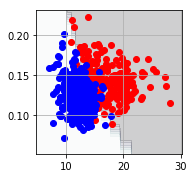

In [56]:
# fig = plt.figure(figsize=(12, 3 * SubplotRow))
# SVM_plot(SvcPoly, ['mean radius', 'worst smoothness'], "Test", 1)

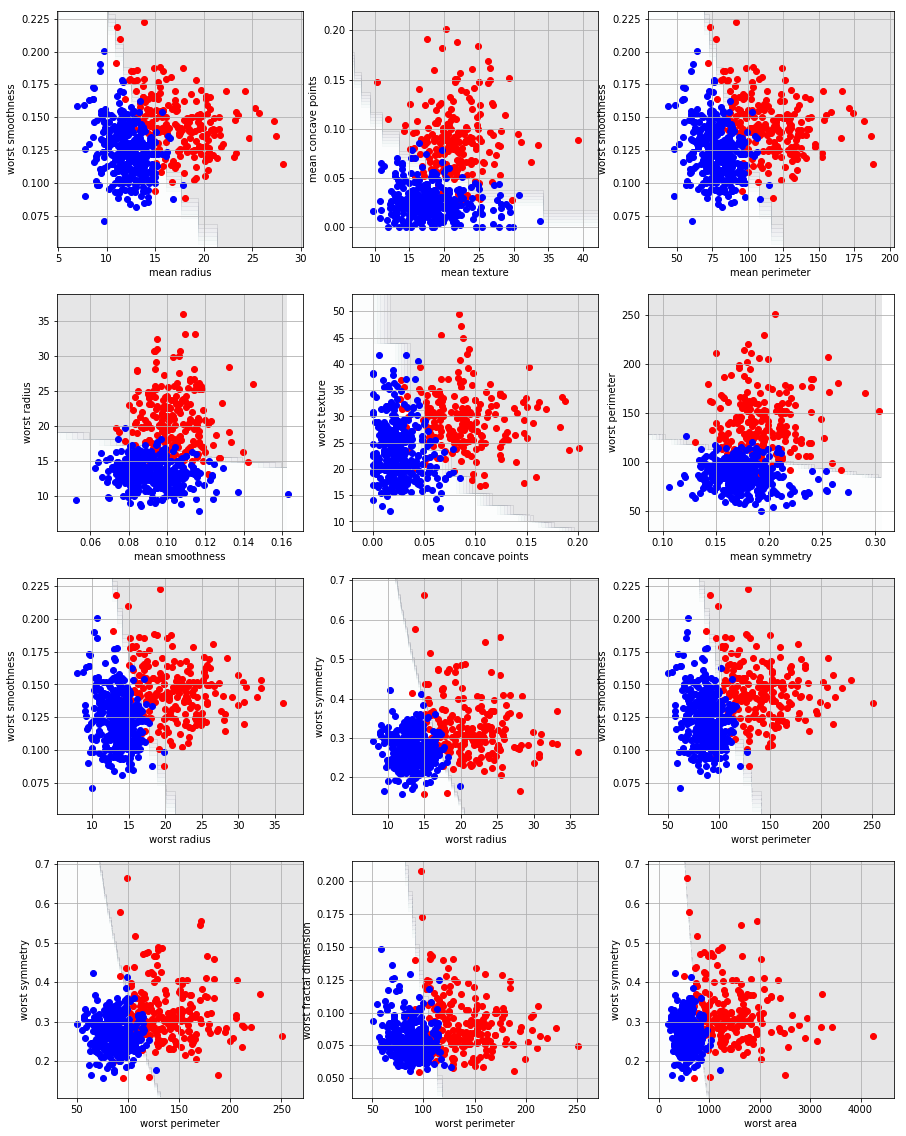

In [89]:
fig = plt.figure(figsize=(15, 5 * SubplotRow))
FigCount = 1
for plotFeature in plot_Featurelist:
    SvcPoly = svm.SVC(kernel = 'poly', gamma='auto', degree = 2)
    x_train_poly, x_test_poly, y_train_poly, y_test_poly, = train_test_split(X_RawData[plotFeature], breast_cancer.target ,test_size = 0.3, random_state = 40)
    SvcPoly.fit(x_train_poly, y_train_poly) 
    FigTitle = plotFeature[0] + ' and ' + plotFeature[1] 
    SubFig = fig.add_subplot(SubplotRow, FigColumnCount, FigCount)
    SVM_plot(SvcPoly, plotFeature, SubFig)
    FigCount += 1

Extra03 結論：利用 30 個變數任取兩個做 svm.kernal = 'poly' 建模，共有 12 組變數組合屬於低相關性，且建模訓練分數與測試分數均達 0.9 以上，以圖像化結果顯示對惡性、良性腫瘤的區隔能力均佳。

In [85]:
# fig = plt.figure(figsize=(12, 3 * SubplotRow))

# ax = fig.add_subplot(SubplotRow, 4, i)
# ax2 = fig.add_subplot(SubplotRow, 4, 8)
# x = np.linspace(0, 4, 1000)
# ax.plot(x, np.sin(x))
# ax2.plot(x, np.cos(x), 'r:')

In [20]:
# x_train_poly, x_test_poly, y_train_poly, y_test_poly, = train_test_split(X_RawData[FeatureGroup], breast_cancer.target ,test_size=0.3, random_state = 40)

In [86]:
# print('train accuracy:', round(SvcPoly.score(x_train_poly,y_train_poly), 4))
# print('test accuracy:', round(SvcPoly.score(x_test_poly, y_test_poly), 4))

In [87]:
# SvcPoly.n_features_in_